In [1]:
import cv2
import numpy as np
import sys
import matplotlib.pyplot as plt
# impotar imagen
# =====================================
img1 = cv2.imread('anime1.jpg')
img2 = cv2.imread('anime2.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)


In [2]:
# Funcion para graficar 2 imagenes
def grafic(img1,img2,tit):
    fig, axs = plt.subplots(1,2, figsize=(15, 8))
    fig.suptitle(tit,fontsize=35)
    axs[0].set_title('Imagen 1',fontsize=25)
    axs[0].imshow(img1, origin='upper')
    axs[1].set_title('Imagen 2',fontsize=25)
    axs[1].imshow(img2, origin='upper')
    plt.show()
    
# Funcion para binarizar imagenes
def binary(img,umbral):
    alto = img.shape[0]
    ancho = img.shape[1]
    binary = np.zeros((alto, ancho,3))
    gray = np.zeros((alto, ancho,3))
    for i in range(0, alto):
        for j in range(0, ancho):
            pixel = img[i,j]
            gray[i,j][0]=pixel.mean()
            gray[i,j][1]=pixel.mean()
            gray[i,j][2]=pixel.mean()

    for i in range(0, alto):
        for j in range(0, ancho):
            pixel=gray[i,j]
            if pixel.mean() > umbral:
                binary[i,j][0] = 255
                binary[i,j][1] = 255 
                binary[i,j][2] = 255 
    return(binary.astype(int),gray.astype(int))

# funcion para aplicar operaciones a las imagenes
def opera_img(img1,img2,operacion):
    um=170
    if operacion == "sumar":
        out=img1+img2
        return(out)
    if operacion == "restar":
        out= img1-img2
        return(out)
    if operacion == "and":
        img_1,gray= binary(img1,um)
        img_2,gray=binary(img2,um)
        out=img_1 & img_2
        return(out)
    if operacion == "or":
        img_1,gray= binary(img1,um)
        img_2,gray=binary(img2,um)
        out= img_1 | img_2
        return(out)
    if operacion == "xor":
        img_1,gray= binary(img1,um)
        img_2,gray=binary(img2,um)
        out=img_1 ^ img_2
        return(out)
    
# funcion para bajar a disco
def disco(i):
    cv2.imwrite("img_cg.jpg", i)
    temp_red = cv2.imread("img_cg.jpg")
    temp_red = cv2.cvtColor(temp_red, cv2.COLOR_BGR2RGB)
    return(temp_red)

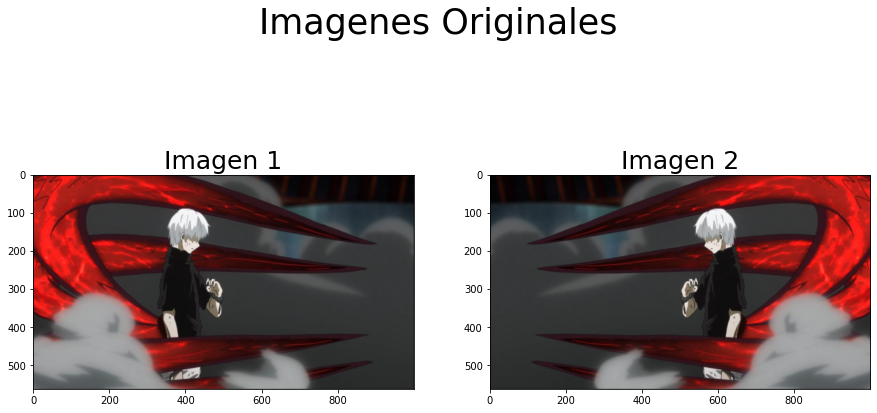

In [3]:
grafic(img1,img2,"Imagenes Originales")

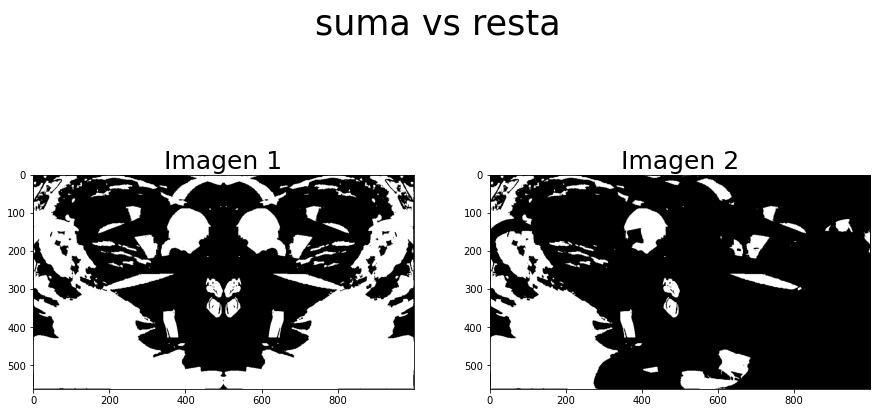

In [4]:
um=80
abin,agray=binary(img1,um)
bbin,bgray=binary(img2,um)
sumar=disco(opera_img(abin,bbin,"sumar"))
restar=disco(opera_img(abin,bbin,"restar"))
grafic(sumar,restar,"suma vs resta")

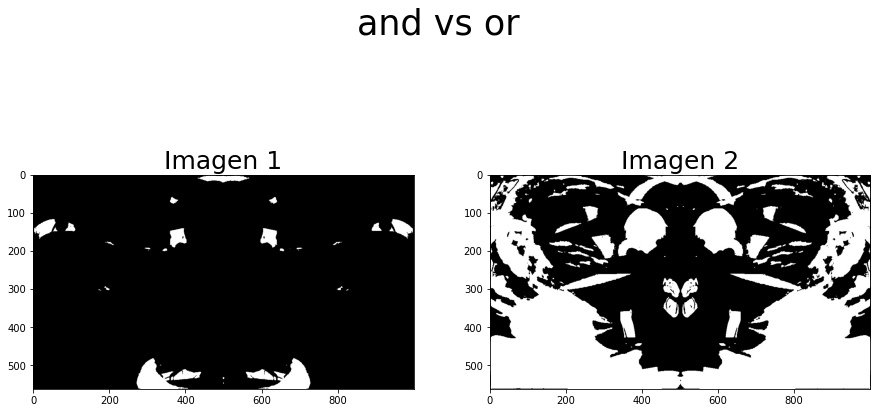

In [5]:
abin,agray=binary(img1,um)
bbin,bgray=binary(img2,um)
sumar=disco(opera_img(abin,bbin,"and"))
restar=disco(opera_img(abin,bbin,"or"))
grafic(sumar,restar,"and vs or")

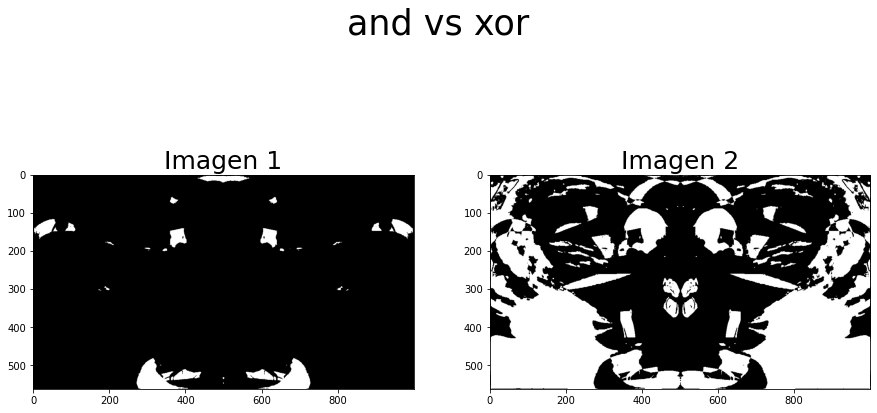

In [6]:
abin,agray=binary(img1,um)
bbin,bgray=binary(img2,um)
sumar=disco(opera_img(abin,bbin,"and"))
restar=disco(opera_img(abin,bbin,"xor"))
grafic(sumar,restar,"and vs xor")

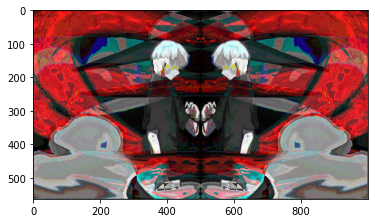

In [7]:
plt.imshow(img1 ^ img2)

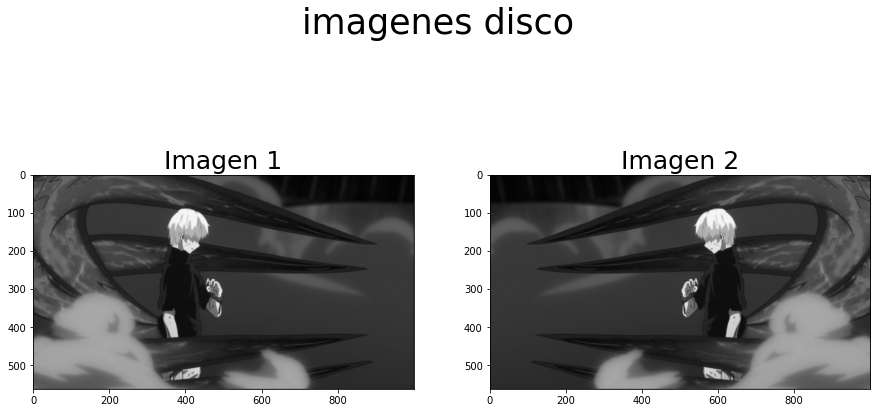

In [8]:
grafic(agray,bgray,"imagenes disco")

In [9]:
agray

array([[[ 13,  13,  13],
        [ 18,  18,  18],
        [ 24,  24,  24],
        ...,
        [  3,   3,   3],
        [  3,   3,   3],
        [  3,   3,   3]],

       [[ 21,  21,  21],
        [ 26,  26,  26],
        [ 31,  31,  31],
        ...,
        [  4,   4,   4],
        [  3,   3,   3],
        [  3,   3,   3]],

       [[ 22,  22,  22],
        [ 29,  29,  29],
        [ 34,  34,  34],
        ...,
        [  4,   4,   4],
        [  3,   3,   3],
        [  3,   3,   3]],

       ...,

       [[ 71,  71,  71],
        [ 92,  92,  92],
        [112, 112, 112],
        ...,
        [ 42,  42,  42],
        [ 34,  34,  34],
        [ 26,  26,  26]],

       [[ 76,  76,  76],
        [ 96,  96,  96],
        [115, 115, 115],
        ...,
        [ 38,  38,  38],
        [ 31,  31,  31],
        [ 22,  22,  22]],

       [[ 42,  42,  42],
        [ 61,  61,  61],
        [ 79,  79,  79],
        ...,
        [ 34,  34,  34],
        [ 26,  26,  26],
        [ 18,  18,  18]]

In [10]:
abin

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[  0,   0,   0],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]